Ковшик А.С. 201-362

# Непрерывные распределения. Распределение Лапласа

$$f(x)=\frac{\alpha}2e^{-\alpha|x-\beta|}$$

Математическое ожидание: $ \beta $

Дисперсия: $ \frac{2}{\alpha^2} $

Использованные ресурсы:
- https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace.html

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

%matplotlib inline
np.random.seed(1)

In [118]:
# Зададим теоретическую случайную величину, подчиненную распределению Лапласа с параметрами альфа и бета
myalpha = 1 # коэффициент масштаба
mybeta = 0 # коэффициент сдвига
laplace_rv = sts.laplace(loc=mybeta, scale=myalpha)

# Зададим 1000 случайных значений, подчиненных распределению Лапласа
sample = laplace_rv.rvs(1000)

Text(0.5, 0, '$x$')

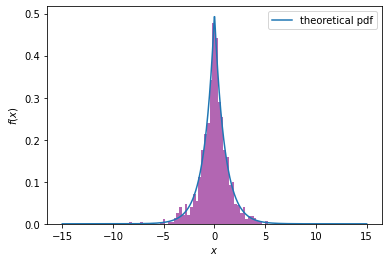

In [119]:
x = np.linspace(-15, 15, 1000)
pdf = laplace_rv.pdf(x) #плотность теоретической величины
plt.hist(sample, bins = 'auto', color='purple', density = True, alpha=0.6) #гистограмма по 1000 полученным случайным значениям
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [120]:
# функция 1000 раз генерирует выборку объема n, подчиненную распределению Лапласа, вычисляет среднее значение, 
# и добавляет его в list_x
def sample_laplace(n):
    list_x = []
    for i in range(1000):
        list_n = laplace_rv.rvs(n)
        list_x.append(round(np.mean(list_n),3))
    return list_x

# функция формирования гистограммы выборки и графика плотности соответствующего нормального распределения с параметрами:
# среднее распределения Лапласа равняется его параметру бета
# дисперсия равняется выражению (2/альфа^2)
def graph_sample_theory_laplace(list_x, n):
#   гистограмма выборки
    x = np.linspace(-3, 3, 1000)
    plt.hist(list_x, bins = 'auto', color='purple', density = True, alpha=0.6)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
#   график плотности
    norm_rv = sts.norm(mybeta, ((2/(myalpha**2))/n) ** (0.5))
    x = np.linspace(-3, 3, 100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='laplace pdf', alpha=1)
    plt.legend()
    plt.ylabel('$f(x)$') 
    plt.xlabel('$x$')
    plt.show()


Объем выборки:  5 


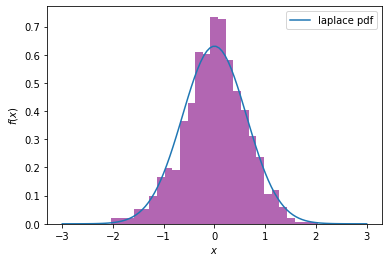

Объем выборки:  10 


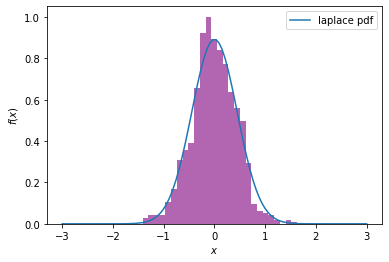

Объем выборки:  50 


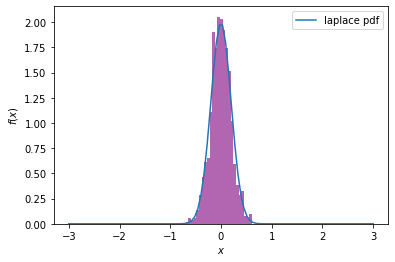

Объем выборки:  100 


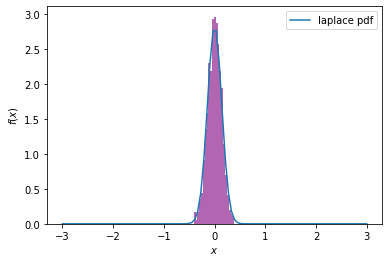

Объем выборки:  1000 


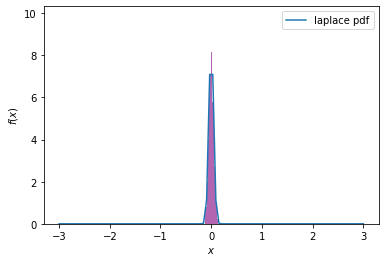

In [121]:
#Определим объем выборок:
choice = (5,10,50,100,1000)
for n in (choice):
    for i in range(1):
        list_x = sample_laplace(n)
        print ('\033[4m' + 'Объем выборки:', '\033[1m', n, '\033[0m')
        graph_sample_theory_laplace(list_x, n)

Выборочное среднее с увеличением выборки приближается к математическому ожиданию нормального распределения. В целом, наблюдается большая концентрация величин вокруг значения выборочного среднего, а следовательно, действительно, при увеличении объема выборок, распределение выборочных средних становится все ближе и ближе к нормальному